A1. Confusion Matrix and Performance Metrics

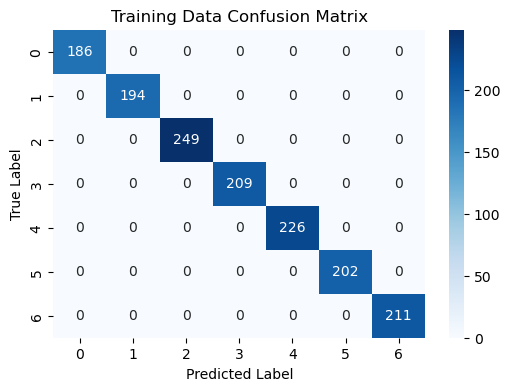

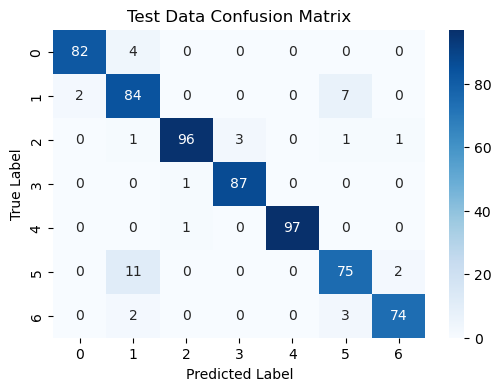

Training Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       186
           1       1.00      1.00      1.00       194
           2       1.00      1.00      1.00       249
           3       1.00      1.00      1.00       209
           4       1.00      1.00      1.00       226
           5       1.00      1.00      1.00       202
           6       1.00      1.00      1.00       211

    accuracy                           1.00      1477
   macro avg       1.00      1.00      1.00      1477
weighted avg       1.00      1.00      1.00      1477

Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        86
           1       0.82      0.90      0.86        93
           2       0.98      0.94      0.96       102
           3       0.97      0.99      0.98        88
           4       1.00      0.99      0.99        98
        

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
file_path = 'Obesity.csv'
df = pd.read_csv(file_path)

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to convert categorical data to numerical data
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the encoder if you need to reverse the encoding later

# Splitting features and target variable
X = df.iloc[:, :-1]  # all columns except the last are features
y = df.iloc[:, -1]   # the last column is the target

# Fill missing values with column mean (if any)
X = X.fillna(X.mean())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a model (RandomForestClassifier used as an example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate on training data
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred, output_dict=True)

# Evaluate on test data
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred, output_dict=True)

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(train_conf_matrix, "Training Data Confusion Matrix")
plot_confusion_matrix(test_conf_matrix, "Test Data Confusion Matrix")

# Print classification reports
print("Training Data Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Test Data Classification Report:")
print(classification_report(y_test, y_test_pred))

# Analyze model fit based on training vs test performance
train_f1 = train_report['weighted avg']['f1-score']
test_f1 = test_report['weighted avg']['f1-score']

print(f"Training F1-Score: {train_f1:.2f}")
print(f"Test F1-Score: {test_f1:.2f}")

# Infer the model's learning outcome
if train_f1 > test_f1 + 0.1:
    print("The model is likely overfitting (high performance on training data but lower on test data).")
elif train_f1 < test_f1:
    print("The model might be underfitting (low performance on both training and test data).")
else:
    print("The model seems to be regular fitting (balanced performance on both training and test data).")

A2. Regression Metrics

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = pd.read_csv('Obesity.csv')

# Define input features and target output
X = data[['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 
          'family_history_with_overweight', 'FAF', 'TUE', 'CAEC', 'MTRANS']]  # Example of input features
y = data['NObeyesdad']  

# Convert categorical features if necessary (e.g., 'Gender' and other categorical variables)
X = pd.get_dummies(X, drop_first=True)

# Convert the target variable to numeric if it is categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train a classification model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute classification metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8652482269503546
Confusion Matrix:
 [[56  0  0  0  0  0  0]
 [ 9 39  0  0  0 11  3]
 [ 0  0 69  7  0  0  2]
 [ 0  0  2 56  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  5  0  0  0 41 10]
 [ 0  0  3  0  0  5 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        56
           1       0.89      0.63      0.74        62
           2       0.93      0.88      0.91        78
           3       0.89      0.97      0.93        58
           4       1.00      1.00      1.00        63
           5       0.72      0.73      0.73        56
           6       0.74      0.84      0.79        50

    accuracy                           0.87       423
   macro avg       0.86      0.86      0.86       423
weighted avg       0.87      0.87      0.86       423



A3. Scatter Plot of Training Data

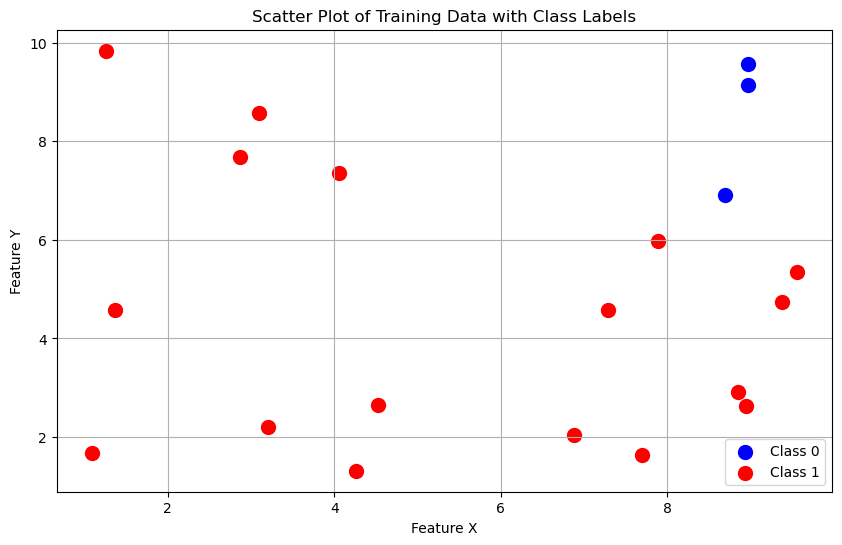

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(1000)

# Generate 20 data points with random values between 1 and 10
X = np.random.uniform(1, 10, size=(20, 2))

# Generate class labels (0 or 1) based on some arbitrary criteria for demonstration
# For simplicity, let's say class0 if sum of X > 15 else class1
y = np.where(X.sum(axis=1) > 15, 0, 1)

# Create a DataFrame
df = pd.DataFrame(X, columns=['X', 'Y'])
df['Class'] = y

# Scatter plot of the training data
plt.figure(figsize=(10, 6))
plt.scatter(df[df['Class'] == 0]['X'], df[df['Class'] == 0]['Y'], color='blue', label='Class 0', s=100)
plt.scatter(df[df['Class'] == 1]['X'], df[df['Class'] == 1]['Y'], color='red', label='Class 1', s=100)
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Scatter Plot of Training Data with Class Labels')
plt.legend()
plt.grid(True)
plt.show()

A4.kNN classifier (k = 3).

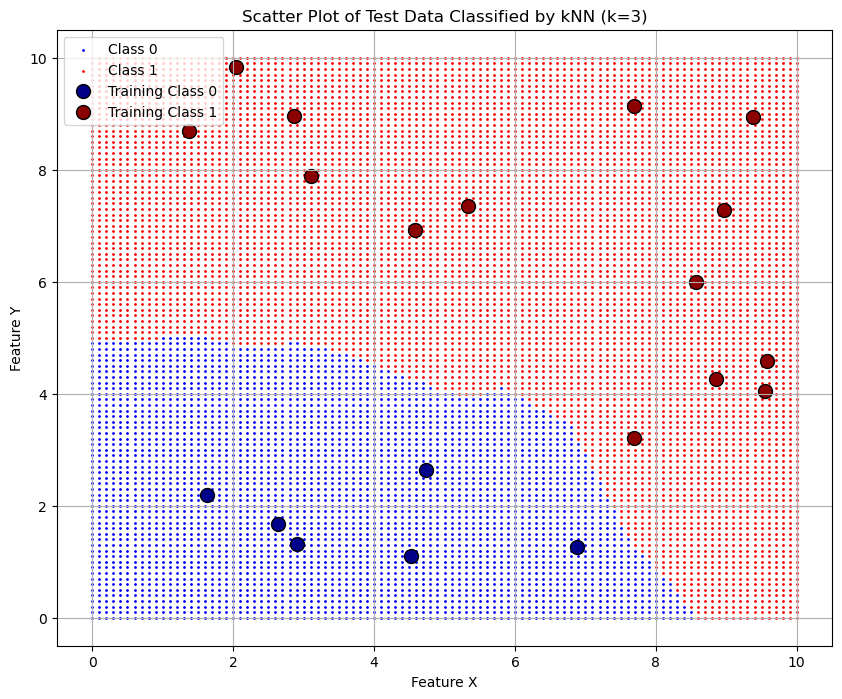

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Generate the training data
np.random.seed(1000)  # For reproducibility
X_train = np.random.uniform(1, 10, 20)  # Generate 20 random numbers for X
Y_train = np.random.uniform(1, 10, 20)  # Generate 20 random numbers for Y
train_classes = np.where(X_train + Y_train > 10, 1, 0)  # Classify based on sum of X + Y

# Combine X and Y into a single array for training
train_data = np.column_stack((X_train, Y_train))

# Step 2: Generate the test data with X and Y ranging from 0 to 10 in increments of 0.1
x_test_range = np.arange(0, 10.1, 0.1)
y_test_range = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_test_range, y_test_range)
X_test_flat = X_test.flatten()
Y_test_flat = Y_test.flatten()

# Combine X and Y into a single array for testing
test_data = np.column_stack((X_test_flat, Y_test_flat))

# Step 3: Train the kNN classifier (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data, train_classes)

# Step 4: Predict the classes of the test data
test_classes_pred = knn.predict(test_data)

# Step 5: Make a scatter plot of the test data with points colored by their predicted class
plt.figure(figsize=(10, 8))
plt.scatter(X_test_flat[test_classes_pred == 0], Y_test_flat[test_classes_pred == 0], 
            color='blue', s=1, label='Class 0')
plt.scatter(X_test_flat[test_classes_pred == 1], Y_test_flat[test_classes_pred == 1], 
            color='red', s=1, label='Class 1')

# Step 6: Plot the training data points as well for reference
plt.scatter(X_train[train_classes == 0], Y_train[train_classes == 0], 
            color='darkblue', edgecolor='k', s=100, label='Training Class 0')
plt.scatter(X_train[train_classes == 1], Y_train[train_classes == 1], 
            color='darkred', edgecolor='k', s=100, label='Training Class 1')

# Step 7: Labeling the plot
plt.title('Scatter Plot of Test Data Classified by kNN (k=3)')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.legend()
plt.grid(True)
plt.show()

A5. Effect of Different k Values

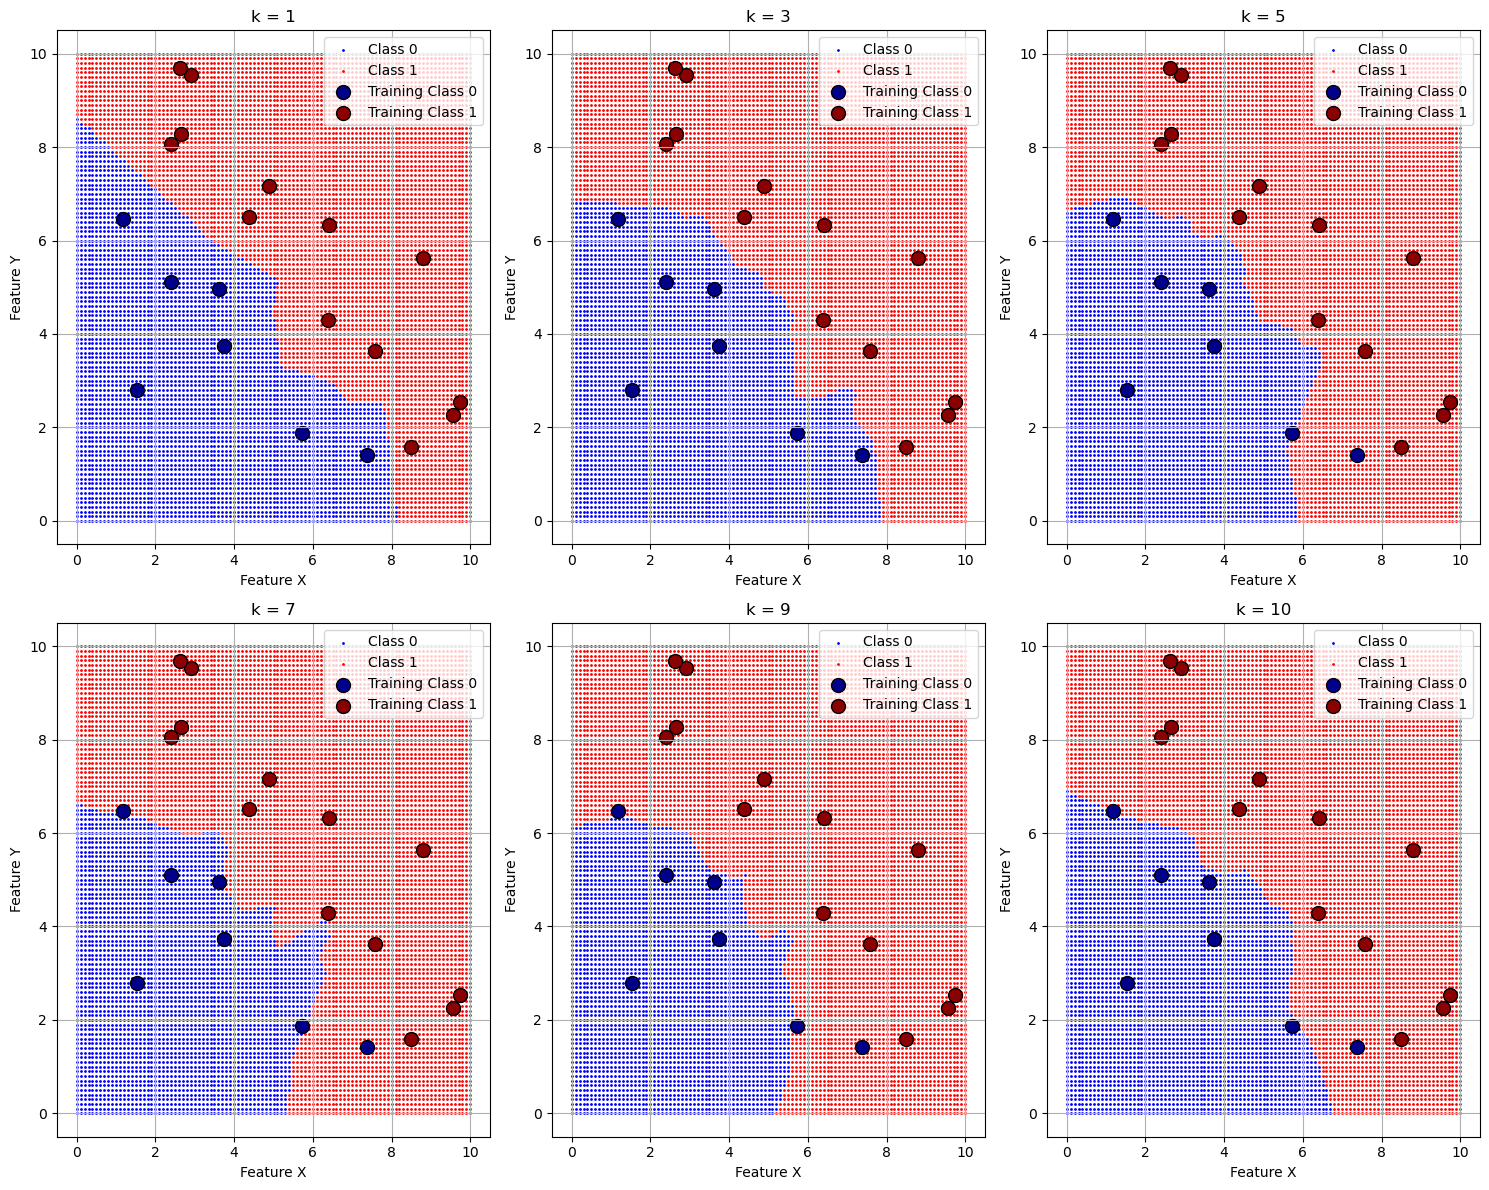

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Generate the training data
np.random.seed(42)
X_train = np.random.uniform(1, 10, 20)  # Generate 20 random numbers for X
Y_train = np.random.uniform(1, 10, 20)  # Generate 20 random numbers for Y
train_classes = np.where(X_train + Y_train > 10, 1, 0)  # Classify based on sum of X + Y

# Combine X and Y into a single array for training
train_data = np.column_stack((X_train, Y_train))

# Step 2: Generate the test data with X and Y ranging from 0 to 10 in increments of 0.1
x_test_range = np.arange(0, 10.1, 0.1)
y_test_range = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_test_range, y_test_range)
X_test_flat = X_test.flatten()
Y_test_flat = Y_test.flatten()

# Combine X and Y into a single array for testing
test_data = np.column_stack((X_test_flat, Y_test_flat))

# Step 3: Define a list of k values to test
k_values = [1, 3, 5, 7, 9, 10]

# Step 4: Plotting the class boundaries for each k value
plt.figure(figsize=(15, 12))
for idx, k in enumerate(k_values, start=1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, train_classes)
    
    # Step 5: Predict the classes of the test data
    test_classes_pred = knn.predict(test_data)
    
    # Step 6: Create a subplot for each k value
    plt.subplot(2, 3, idx)
    plt.scatter(X_test_flat[test_classes_pred == 0], Y_test_flat[test_classes_pred == 0], 
                color='blue', s=1, label='Class 0')
    plt.scatter(X_test_flat[test_classes_pred == 1], Y_test_flat[test_classes_pred == 1], 
                color='red', s=1, label='Class 1')
    
    # Step 7: Plot the training data points as well for reference
    plt.scatter(X_train[train_classes == 0], Y_train[train_classes == 0], 
                color='darkblue', edgecolor='k', s=100, label='Training Class 0')
    plt.scatter(X_train[train_classes == 1], Y_train[train_classes == 1], 
                color='darkred', edgecolor='k', s=100, label='Training Class 1')
    
    plt.title(f'k = {k}')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

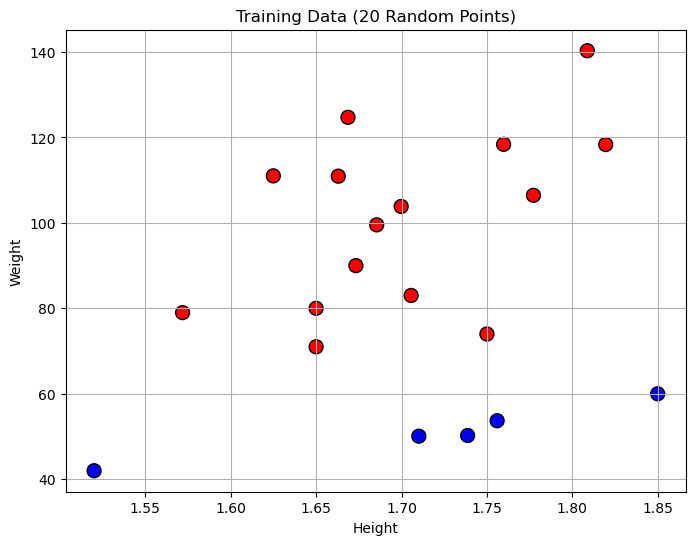

C:\Users\YASWANTH\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


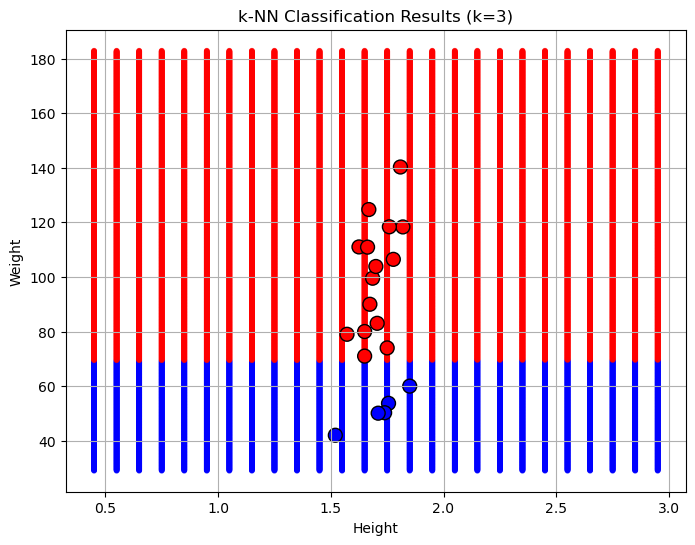

C:\Users\YASWANTH\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


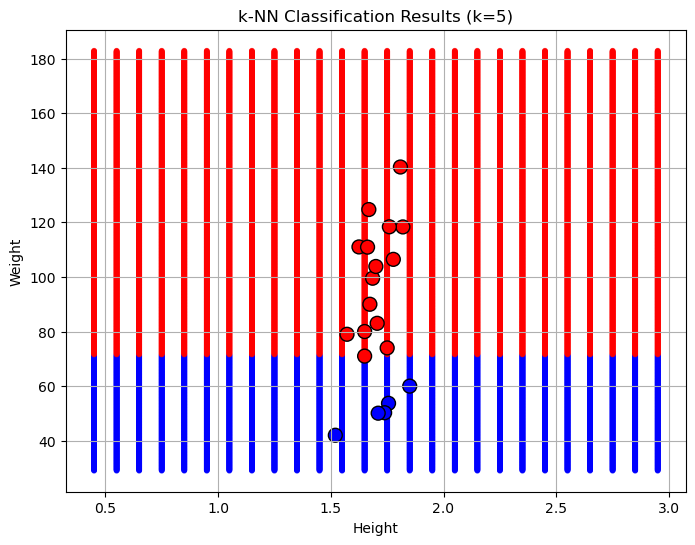

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# 1. Load the dataset (Assuming you already have the dataset loaded as 'data')
# Features: Height and Weight, Target: NObeyesdad
# Load your dataset
data = pd.read_csv('Obesity.csv')

features = data[['Height', 'Weight']]
labels = data['NObeyesdad']

# 2. Encode the target labels into numerical values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# 3. Generate the training data (20 random points)
np.random.seed(42)  # For reproducibility
train_indices = np.random.choice(features.index, size=20, replace=False)
train_data = features.loc[train_indices]
train_labels = encoded_labels[train_indices]

# 4. Plot the training data
colors = ['Blue' if label == 0 else 'Red' for label in train_labels]
plt.figure(figsize=(8, 6))
plt.scatter(train_data['Height'], train_data['Weight'], c=colors, s=100, edgecolor='k')
plt.title('Training Data (20 Random Points)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

# 5. Generate the test data (X and Y values between 0 and 10 with 0.1 increment)
x_min, x_max = features['Height'].min() - 1, features['Height'].max() + 1
y_min, y_max = features['Weight'].min() - 10, features['Weight'].max() + 10

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
test_points = np.c_[xx.ravel(), yy.ravel()]

# 6. Apply k-NN classification (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data, train_labels)

# 7. Predict the class for each test point
test_predictions = knn.predict(test_points)
test_colors = ['Blue' if label == 0 else 'Red' for label in test_predictions]

# 8. Plot the test data with predictions
plt.figure(figsize=(8, 6))
plt.scatter(test_points[:, 0], test_points[:, 1], c=test_colors, s=10, alpha=0.5)
plt.scatter(train_data['Height'], train_data['Weight'], c=colors, s=100, edgecolor='k')  # Overlay training points
plt.title('k-NN Classification Results (k=3)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

# 9. Experiment with different values of k (e.g., k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_data, train_labels)
test_predictions = knn.predict(test_points)
test_colors = ['Blue' if label == 0 else 'Red' for label in test_predictions]

plt.figure(figsize=(8, 6))
plt.scatter(test_points[:, 0], test_points[:, 1], c=test_colors, s=10, alpha=0.5)
plt.scatter(train_data['Height'], train_data['Weight'], c=colors, s=100, edgecolor='k')  # Overlay training points
plt.title('k-NN Classification Results (k=5)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

A7.find the ideal ‘k’ value for your kNN classifier(hyper-parameter tuning)

In [7]:
#Using RandomSearchCV() 
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
data = pd.read_csv('Obesity.csv')

# Define features and target
X = data[['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O',
          'family_history_with_overweight', 'FAF', 'TUE', 'CAEC', 'MTRANS']]
y = data['NObeyesdad']

# Convert categorical features to dummy variables (if necessary)
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model and parameters for GridSearchCV
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1, 21))}  # k values from 1 to 20

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print the best parameter and best score
print(f"Best k: {grid_search.best_params_['n_neighbors']}")
print(f"Best Score: {grid_search.best_score_}")

# Evaluate the model with the best k
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Best k: 1
Best Score: 0.8185409986257444
Test Accuracy: 0.807570977917981


In [8]:
#Using  GridSearchCV()
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint

# Load your dataset
data = pd.read_csv('Obesity.csv')

# Define features and target
X = data[['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O',
          'family_history_with_overweight', 'FAF', 'TUE', 'CAEC', 'MTRANS']]
y = data['NObeyesdad']

# Convert categorical features to dummy variables (if necessary)
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model and parameters for RandomizedSearchCV
knn = KNeighborsClassifier()
param_dist = {'n_neighbors': randint(1, 21)}  # Randomly select k from 1 to 20

random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_scaled, y_train)

# Print the best parameter and best score
print(f"Best k: {random_search.best_params_['n_neighbors']}")
print(f"Best Score: {random_search.best_score_}")

# Evaluate the model with the best k
best_knn = random_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Best k: 1
Best Score: 0.8185409986257444
Test Accuracy: 0.807570977917981
